# **빅데이터처리 프로젝트**

### 전국 범죄 발생 현황 및 범죄 발생 장소에 대한 통계

### 202044012_김윤호

### 한글설정

In [2]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설


In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

## **범죄 검거율과 범죄 장소에 대한 분석**

## 1. 장소에 따른 범죄 유형 발생건수


<Figure size 1400x800 with 0 Axes>

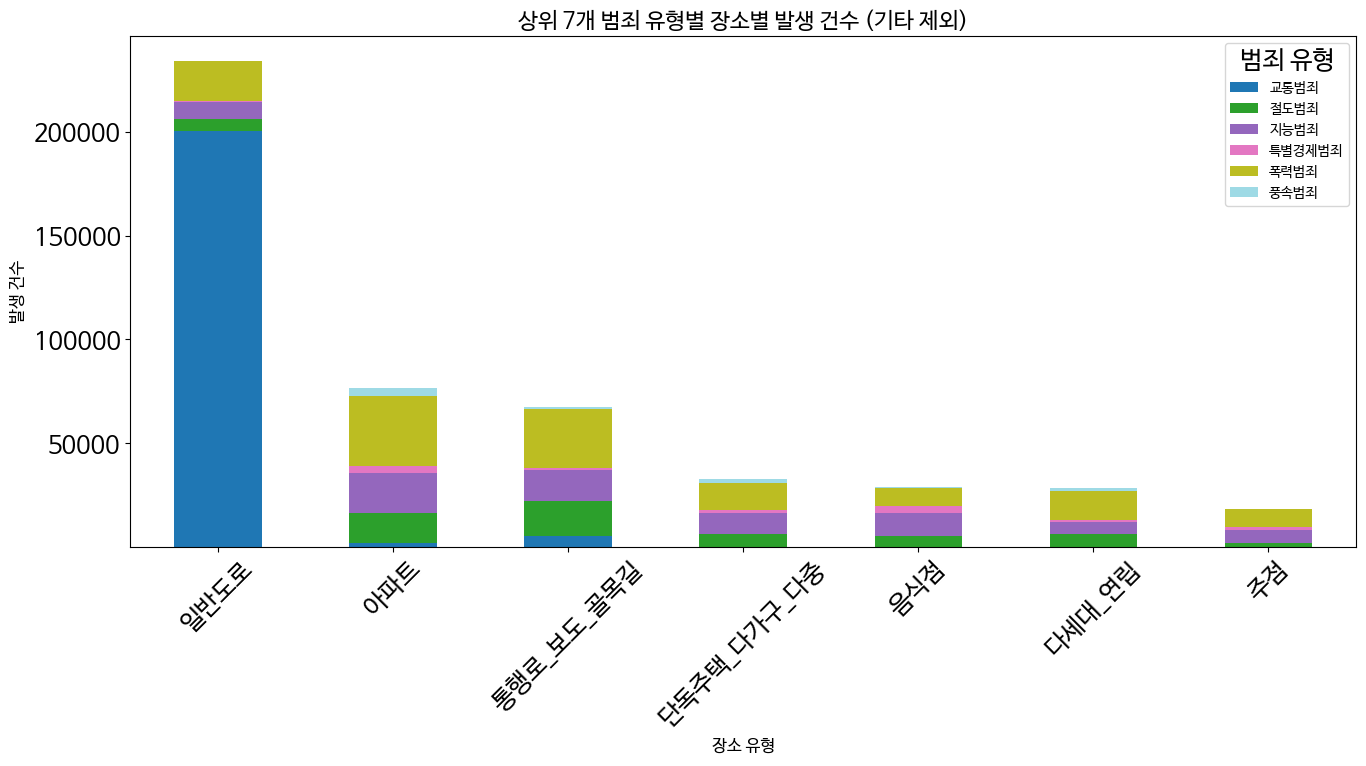

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
crime_arrest = pd.read_csv('/content/crime_arrest.csv', encoding='cp949')
crime_place = pd.read_csv('/content/crime_place.csv', encoding='cp949')

# "기타" 항목 제거
crime_place = crime_place.loc[:, ~crime_place.columns.str.contains("기타|미상")]
crime_place = crime_place[~crime_place['범죄대분류'].str.contains("기타|미상", na=False)]

# 범죄별 발생 상위 7개 추출
crime_arrest_summary = crime_arrest.groupby('범죄대분류').sum()[['발생']]
top_7_crimes = crime_arrest_summary.sort_values('발생', ascending=False).head(7).index

# 장소 데이터에서 상위 7개 범죄만 필터링
filtered_crime_place = crime_place[crime_place['범죄대분류'].isin(top_7_crimes)]

# 장소별 발생 건수 합산
crime_location_summary = filtered_crime_place.groupby('범죄대분류').sum().select_dtypes(include=['number'])
top_locations = crime_location_summary.sum(axis=0).sort_values(ascending=False).head(7).index  # 상위 7개 장소

# 데이터 재구성: 상위 7개 범죄 유형과 장소만 선택
filtered_locations = crime_location_summary[top_locations]

# Stacked bar chart for crime occurrence by location
plt.figure(figsize=(14, 8))
filtered_locations.T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('상위 7개 범죄 유형별 장소별 발생 건수 (기타 제외)', fontsize=16)
plt.xlabel('장소 유형', fontsize=12)
plt.ylabel('발생 건수', fontsize=12)
plt.legend(title='범죄 유형', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2-1. 데이터로드

In [36]:
import pandas as pd

# 데이터 로드
crime_arrest = pd.read_csv('/content/crime_arrest.csv', encoding='cp949')

# 발생과 검거 합계 계산
crime_arrest_summary = crime_arrest.groupby('범죄중분류').agg({'발생': 'sum', '검거': 'sum'}).reset_index()

# 검거율 계산
crime_arrest_summary['검거율 (%)'] = (crime_arrest_summary['검거'] / crime_arrest_summary['발생']) * 100

# 검거율 확인
print("\nCrime Arrest Summary:")
print(crime_arrest_summary)



Crime Arrest Summary:
          범죄중분류      발생      검거     검거율 (%)
0            강간    5263    4981   94.641839
1            강도     495     487   98.383838
2          강제추행   13962   13215   94.649764
3             계  481588  378273   78.547015
4            공갈    5131    2362   46.033912
5          교통사고  190488  183837   96.508441
6         교통사고외  118146  116843   98.897127
7   기타 강간·강제추행등     238     238  100.000000
8          도박범죄    6391    6151   96.244719
9         문서·인장   10472    7771   74.207410
10           방화    1046     949   90.726577
11           배임    3466    3027   87.334103
12           사기  294075  180418   61.351016
13         살인기수     270     261   96.666667
14        살인미수등     388     380   97.938144
15           상해   28453   27657   97.202404
16        성풍속범죄   16969   13988   82.432671
17           손괴   54188   33312   61.474865
18        약취·유인     240     220   91.666667
19       유가증권인지      63      39   61.904762
20         유사강간     814     783   96.191646
21       

## 2-2. Crime Place 데이터에서 범죄 발생 Top 5 뽑기

In [51]:
# Crime Place 데이터 로드
crime_place = pd.read_csv('/content/crime_place.csv', encoding='cp949')

# 범죄중분류별로 발생 건수 합산
crime_place_summary = crime_place.groupby('범죄중분류').sum(numeric_only=True).reset_index()

# 발생 건수가 가장 높은 5개의 범죄 중분류 선택
top_5_crimes = crime_place_summary.nlargest(5, '단독주택_다가구_다중')  # 특정 열로 예시
print("\n범죄 발생 Top 5:")
print(top_5_crimes)



범죄 발생 Top 5:
   범죄중분류  단독주택_다가구_다중    아파트  다세대_연립  오피스텔_원룸  기타거주시설_기숙사 등  고속도로  자동차 전용도로  \
6   기타범죄        11219  22129   10127     5367          2145   775       452   
15    사기         9486  15989    4947     3535          3364   972       180   
26  절도범죄         6109  14565    5884     3078          1023    32        19   
34    폭행         6018  18074    7239     2640           798   161       176   
21    손괴         2943   7403    3293     1504           393    45        22   

     일반도로  통행로_보도_골목길  ...  야외_산야     해안  폐가_공터  공중화장실   관공서  군사기지_군사시설  구금장소  \
6   20080        9509  ...   4365  15674    380    151  9370        818   170   
15   4296        6392  ...   1767    313    109      5  1515        143    95   
26   6036       16523  ...   5878    156    733    468   344         22    22   
34   9345       15950  ...   2314     39    171    125   433         83   137   
21   4823        7190  ...   2465     48    239    112    76          4    12   

    사회복지시설      기타     미

## 2-3. Top 5 범죄 중분류별 장소별 발생 건수 시각화

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_top_7_places(crime_place_summary, crime_name):
    # 특정 범죄 중분류 데이터 필터링
    crime_data = crime_place[crime_place['범죄중분류'] == crime_name].iloc[:, 2:]  # 장소별 데이터 추출
    place_summary = crime_data.sum().nlargest(7)  # 장소별 발생 건수 합산 후 상위 7개 선택

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(x=place_summary.index, y=place_summary.values, palette='viridis')
    plt.title(f'{crime_name} - 범죄 장소 Top 7')
    plt.xlabel('장소')
    plt.ylabel('발생 건수')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-49-3429f3ea3b9b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_summary.index, y=place_summary.values, palette='viridis')


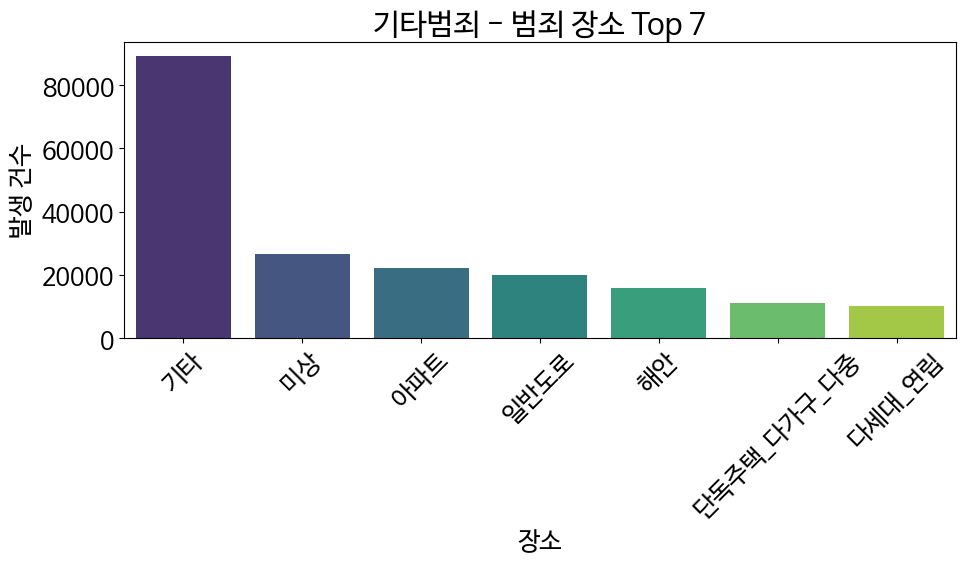

<ipython-input-49-3429f3ea3b9b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_summary.index, y=place_summary.values, palette='viridis')


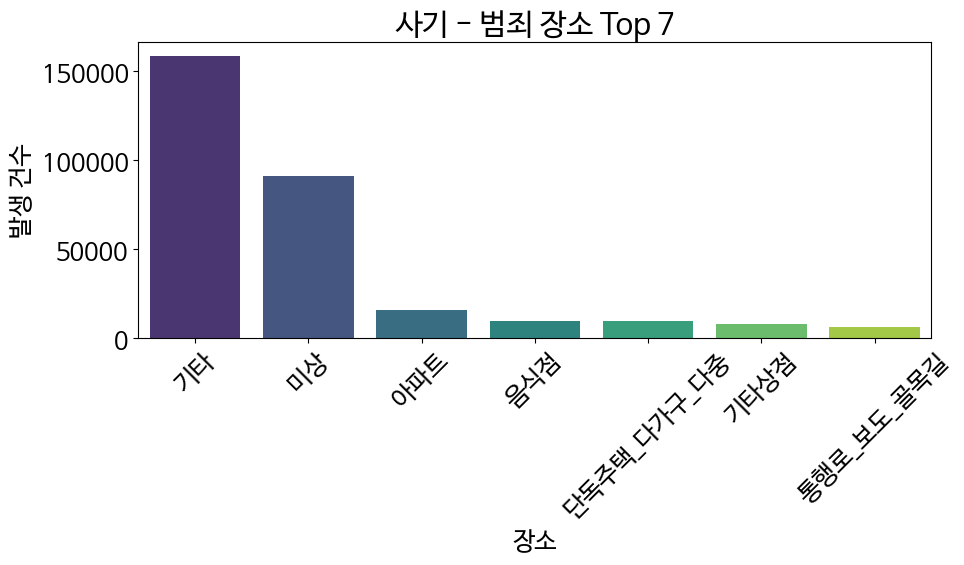

<ipython-input-49-3429f3ea3b9b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_summary.index, y=place_summary.values, palette='viridis')


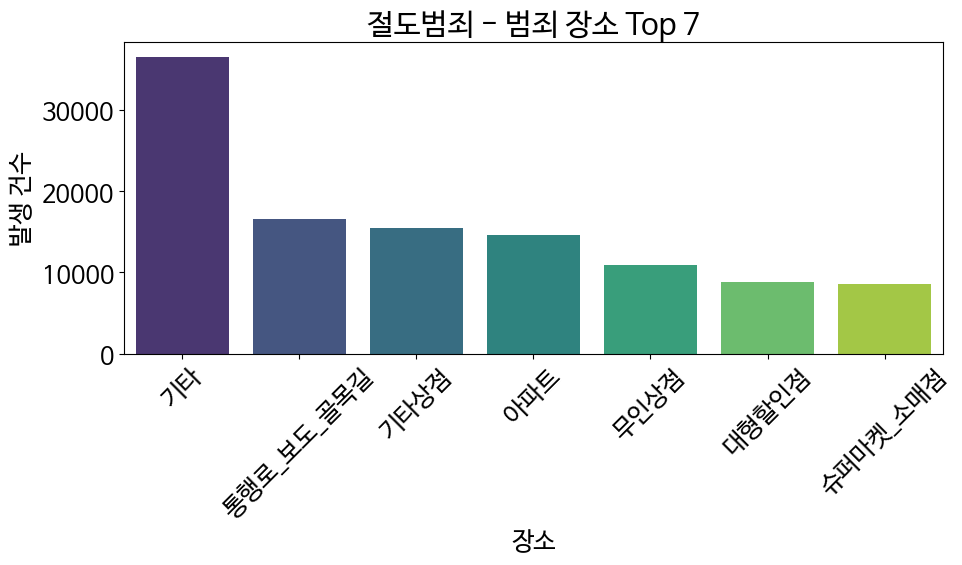

<ipython-input-49-3429f3ea3b9b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_summary.index, y=place_summary.values, palette='viridis')


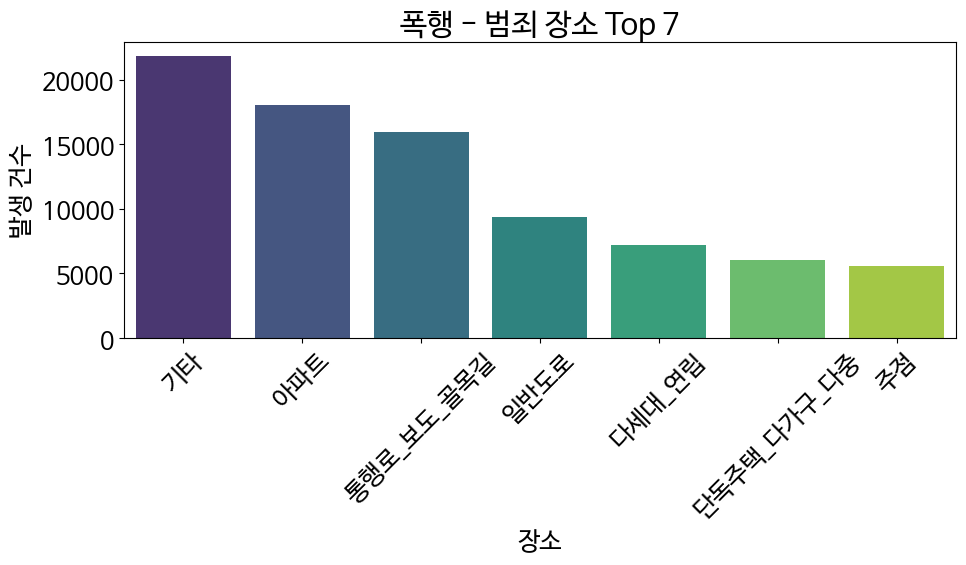

<ipython-input-49-3429f3ea3b9b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_summary.index, y=place_summary.values, palette='viridis')


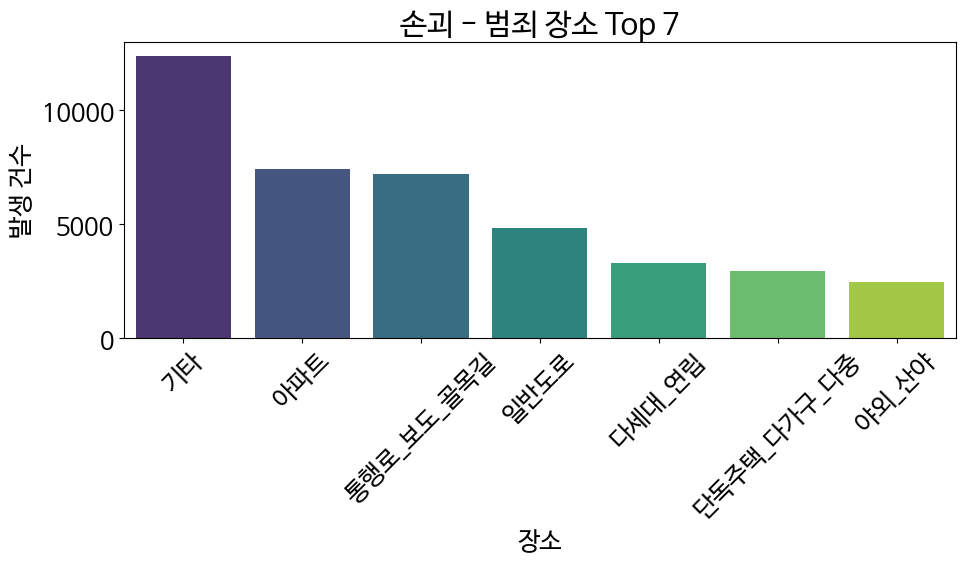

In [52]:
# Top 5 범죄 중분류별 시각화
for crime in top_5_crimes['범죄중분류']:
    visualize_top_7_places(crime_place, crime)


## 2.4 범죄의 분류별 발생 건수와 검거

In [40]:
# Group crime_arrest by 범죄중분류
crime_arrest_summary = crime_arrest.groupby('범죄중분류').agg({
    '발생': 'sum', '검거': 'sum'
}).reset_index()
crime_arrest_summary['검거율 (%)'] = (crime_arrest_summary['검거'] / crime_arrest_summary['발생']) * 100

# Group crime_place by 범죄중분류 and sum numeric columns
crime_place_summary = crime_place.groupby('범죄중분류').sum(numeric_only=True).reset_index()

# Merge the two datasets on 범죄중분류
merged_data = pd.merge(crime_place_summary, crime_arrest_summary, on='범죄중분류', how='inner')

print("\nMerged Data:")
print(merged_data)



Merged Data:
     범죄중분류  단독주택_다가구_다중    아파트  다세대_연립  오피스텔_원룸  기타거주시설_기숙사 등  고속도로  자동차 전용도로  \
0       강간          418    680     624      693            69     0         0   
1       강도           36     40      29       42             9     1         1   
2     강제추행          438    847     498      435           114    15         4   
3       공갈          354    745     204      114            96     1         0   
4     도박범죄          804    489     229      133           105     0         0   
5       방화          202    215     161       51            35     1         0   
6       배임           45    210      19       28            49     0         0   
7       사기         9486  15989    4947     3535          3364   972       180   
8     살인기수           48     66      38       16             6     0         1   
9    살인미수등           61     67      45       19            13     1         1   
10      상해         1463   2703    1128      684           260    43        19   
11   성풍속범죄    

## 2-5. 범죄중분류별 발생 건수와 검거율

<ipython-input-41-220fbd95d6a5>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(merged_data['범죄중분류'], rotation=45, ha='right')


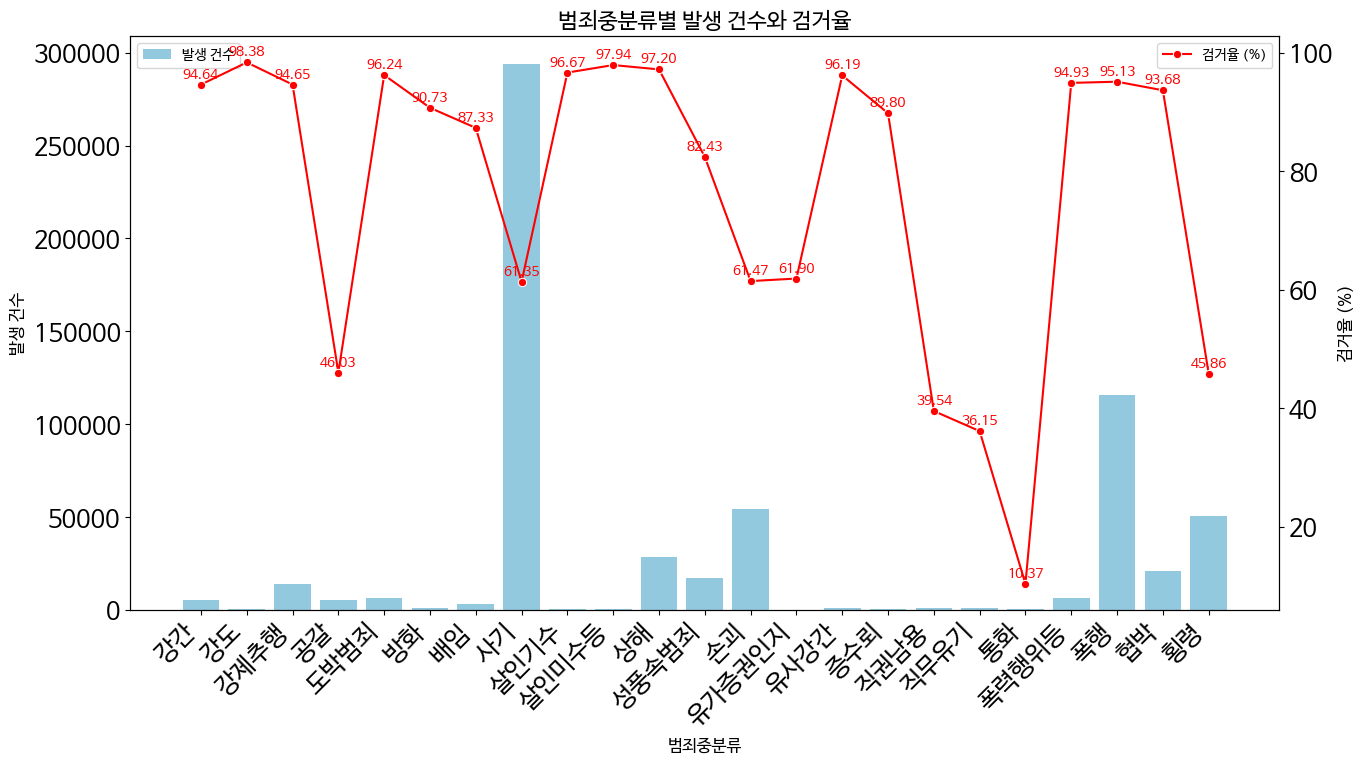

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 범죄중분류별 발생 건수와 검거율 시각화
plt.figure(figsize=(14, 8))

# 발생 건수 막대그래프
ax = sns.barplot(
    x=merged_data['범죄중분류'],
    y=merged_data['발생'],
    color='skyblue',
    label='발생 건수'
)

# 검거율 추가 (라인플롯)
ax2 = ax.twinx()
sns.lineplot(
    x=merged_data['범죄중분류'],
    y=merged_data['검거율 (%)'],
    color='red',
    label='검거율 (%)',
    marker='o',
    ax=ax2
)

# 검거율 텍스트 추가
for i, (x, y) in enumerate(zip(merged_data['범죄중분류'], merged_data['검거율 (%)'])):
    ax2.text(i, y + 1, f'{y:.2f}', color='red', ha='center', fontsize=10)

# 그래프 꾸미기
ax.set_title('범죄중분류별 발생 건수와 검거율', fontsize=16)
ax.set_xlabel('범죄중분류', fontsize=12)
ax.set_ylabel('발생 건수', fontsize=12)
ax2.set_ylabel('검거율 (%)', fontsize=12)
ax.set_xticklabels(merged_data['범죄중분류'], rotation=45, ha='right')
ax.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


### 결론
범죄의 발생건수에 대한 검거율에 대한 통찰 <br>
가장 많은 범죄종류인 "사기"의 검거율이 높게 평가되지 못하는 것으로 보여 <br>
이를 해결하기 위한 수단을 강구해야 함
